# MACHINE LEARNING TECHNIQUES FOR STRESS PREDICTION OF WORKING EMPLOYEES

In [1]:
#  IMPORTING LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# LOADING DATA

data = pd.read_csv('OSMI Mental Health in Tech Survey 2017.csv')
data

,tech_company,tech_role,e_provided health benefits,e_mental_health_awareness,acquiring_leave,discussed_health_e,discussed_health_co,e_discussed_mental_health,e_physical_health,e_mental_health,family_history,share_about_illness,age,gender,stress_level
0,1.0,1.0,No,I don't know,I don't know,0.0,1.0,No,6.0,0.0,No,5,27.0,Female,Possibly
1,1.0,1.0,Yes,No,I don't know,0.0,1.0,No,7.0,2.0,No,4,31.0,male,Possibly
2,1.0,1.0,I don't know,No,Difficult,1.0,1.0,I don't know,0.0,1.0,Yes,5,36.0,male,Yes
3,1.0,1.0,Yes,I don't know,Difficult,1.0,1.0,I don't know,7.0,5.0,I don't know,10,22.0,Male,Yes
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,10,52.0,female,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,1.0,1.0,I don't know,I don't know,Very easy,0.0,1.0,No,6.0,6.0,No,8,41.0,Male,No
752,1.0,1.0,Yes,No,Very easy,1.0,1.0,I don't know,8.0,4.0,No,10,40.0,Male,Yes
753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,1,NaN,NaN,Yes
754,1.0,1.0,Yes,No,Very easy,1.0,0.0,No,6.0,4.0,No,2,30.0,dude,Possibly


In [3]:
data.isnull().sum()

tech_company                  113
tech_role                     113
e_provided health benefits    113
e_mental_health_awareness     113
acquiring_leave               113
discussed_health_e            113
discussed_health_co           113
e_discussed_mental_health     113
e_physical_health             113
e_mental_health               113
family_history                  0
share_about_illness             0
age                             2
gender                         13
stress_level                    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tech_company                643 non-null    float64
 1   tech_role                   643 non-null    float64
 2   e_provided health benefits  643 non-null    object 
 3   e_mental_health_awareness   643 non-null    object 
 4   acquiring_leave             643 non-null    object 
 5   discussed_health_e          643 non-null    float64
 6   discussed_health_co         643 non-null    float64
 7   e_discussed_mental_health   643 non-null    object 
 8   e_physical_health           643 non-null    float64
 9   e_mental_health             643 non-null    float64
 10  family_history              756 non-null    object 
 11  share_about_illness         756 non-null    int64  
 12  age                         754 non-null    float64
 13  gender                      743 non

In [5]:
#  FILLING NULL VALUES USING MODE

mode_tech_company = data['tech_company'].mode()[0]
data['tech_company'].fillna(mode_tech_company,inplace=True)

mode_tech_role = data['tech_role'].mode()[0]
data['tech_role'].fillna(mode_tech_role,inplace=True)

mode_e_provided_health_benefits = data['e_provided health benefits'].mode()[0]
data['e_provided health benefits'].fillna(mode_e_provided_health_benefits,inplace=True)

mode_e_mental_health_awareness = data['e_mental_health_awareness'].mode()[0]
data['e_mental_health_awareness'].fillna(mode_e_mental_health_awareness,inplace=True)

mode_acquiring_leave = data['acquiring_leave'].mode()[0]
data['acquiring_leave'].fillna(mode_acquiring_leave,inplace=True)

mode_discussed_health_e = data['discussed_health_e'].mode()[0]
data['discussed_health_e'].fillna(mode_discussed_health_e,inplace=True)

mode_discussed_health_co = data['discussed_health_co'].mode()[0]
data['discussed_health_co'].fillna(mode_discussed_health_co,inplace=True)

mode_e_discussed_mental_health = data['e_discussed_mental_health'].mode()[0]
data['e_discussed_mental_health'].fillna(mode_e_discussed_mental_health,inplace=True)

mode_e_physical_health = data['e_physical_health'].mode()[0]
data['e_physical_health'].fillna(mode_e_physical_health,inplace=True)

mode_e_mental_health = data['e_mental_health'].mode()[0]
data['e_mental_health'].fillna(mode_e_mental_health,inplace=True)

mode_age = data['age'].mode()[0]
data['age'].fillna(mode_age,inplace=True)

mode_gender = data['gender'].mode()[0]
data['gender'].fillna(mode_gender,inplace=True)


In [6]:
data.isnull().sum()

tech_company                  0
tech_role                     0
e_provided health benefits    0
e_mental_health_awareness     0
acquiring_leave               0
discussed_health_e            0
discussed_health_co           0
e_discussed_mental_health     0
e_physical_health             0
e_mental_health               0
family_history                0
share_about_illness           0
age                           0
gender                        0
stress_level                  0
dtype: int64

In [7]:
# LABEL ENCODING

le = LabelEncoder()
data['e_provided health benefits'] = le.fit_transform(data['e_provided health benefits'])
data['e_mental_health_awareness'] = le.fit_transform(data['e_mental_health_awareness'])
data['acquiring_leave'] = le.fit_transform(data['acquiring_leave'])
data['e_discussed_mental_health'] = le.fit_transform(data['e_discussed_mental_health'])
data['family_history'] = le.fit_transform(data['family_history'])
data['gender'] = le.fit_transform(data['gender'])
data['stress_level'] = le.fit_transform(data['stress_level'])

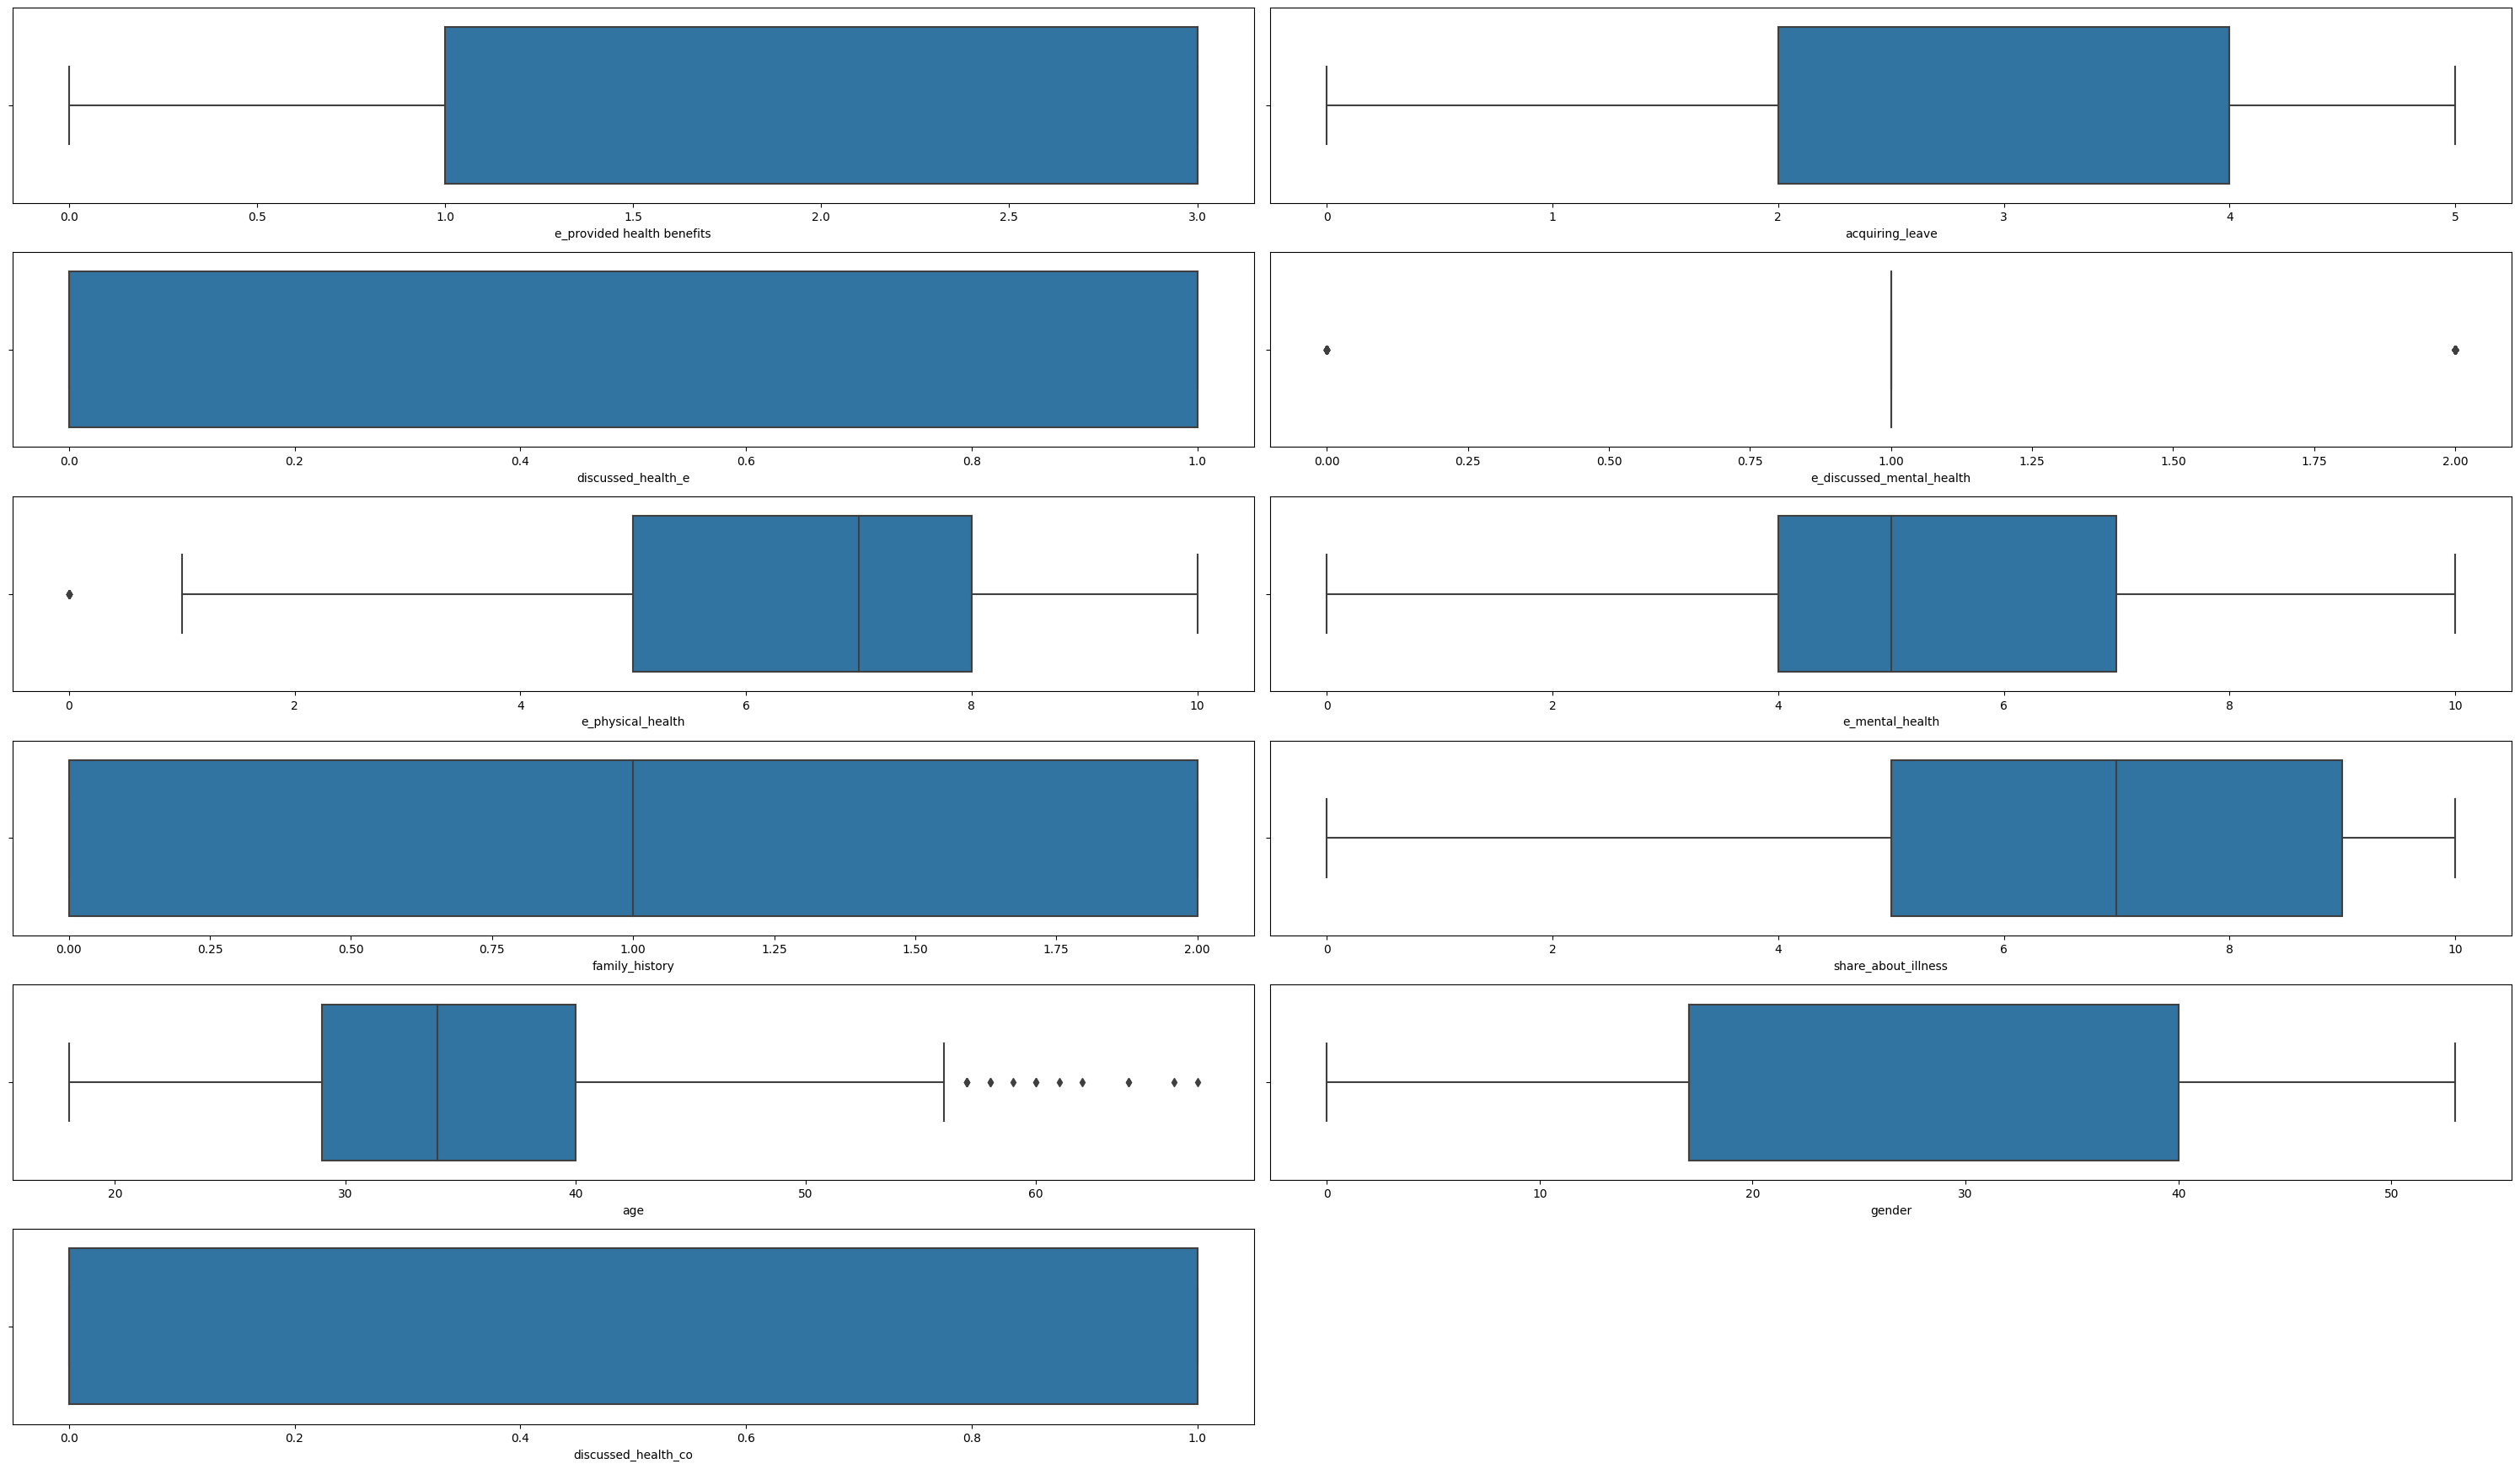

In [8]:
plt.figure(figsize=(30,20))
plt.subplot(7,2,1)
# sns.boxplot(x='tech_company',data=data)
# plt.subplot(7,2,2)
# sns.boxplot(x='tech_role',data=data)
plt.subplot(7,2,1)
sns.boxplot(x='e_provided health benefits',data=data)
# plt.subplot(7,2,1)
# sns.boxplot(x='e_mental_health_awareness',data=data)
plt.subplot(7,2,2)
sns.boxplot(x='acquiring_leave',data=data)
plt.subplot(7,2,3)
sns.boxplot(x='discussed_health_e',data=data)
plt.subplot(7,2,4)
sns.boxplot(x='e_discussed_mental_health',data=data)
plt.subplot(7,2,5)
sns.boxplot(x='e_physical_health',data=data)
plt.subplot(7,2,6)
sns.boxplot(x='e_mental_health',data=data)
plt.subplot(7,2,7)
sns.boxplot(x='family_history',data=data)
plt.subplot(7,2,8)
sns.boxplot(x='share_about_illness',data=data)
plt.subplot(7,2,9)
sns.boxplot(x='age',data=data)
plt.subplot(7,2,10)
sns.boxplot(x='gender',data=data)
plt.subplot(7,2,11)
sns.boxplot(x='discussed_health_co',data=data)
plt.tight_layout()

In [9]:
import numpy as np
q1,q2,q3 = np.percentile(data['age'],[25,50,75])
q1,q2,q3
IQR = q3-q1
IQR
lower = q1-1.5*IQR
upper = q3+1.5*IQR
print("lower: ",lower)
print("upper: ",upper)
filter_data = data[(data['age']>lower)& (data['age']<upper)]
filter_data

lower:  12.5
upper:  56.5


,tech_company,tech_role,e_provided health benefits,e_mental_health_awareness,acquiring_leave,discussed_health_e,discussed_health_co,e_discussed_mental_health,e_physical_health,e_mental_health,family_history,share_about_illness,age,gender,stress_level
0,1.0,1.0,1,0,1,0.0,1.0,1,6.0,0.0,1,5,27.0,7,2
1,1.0,1.0,3,1,1,0.0,1.0,1,7.0,2.0,1,4,31.0,45,2
2,1.0,1.0,0,1,0,1.0,1.0,0,0.0,1.0,2,5,36.0,45,3
3,1.0,1.0,3,0,0,1.0,1.0,0,7.0,5.0,0,10,22.0,17,3
4,1.0,1.0,3,1,4,0.0,0.0,1,7.0,5.0,2,10,52.0,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,1.0,1.0,0,0,5,0.0,1.0,1,6.0,6.0,1,8,41.0,17,1
752,1.0,1.0,3,1,5,1.0,1.0,0,8.0,4.0,1,10,40.0,17,3
753,1.0,1.0,3,1,4,0.0,0.0,1,7.0,5.0,2,1,30.0,17,3
754,1.0,1.0,3,1,5,1.0,0.0,1,6.0,4.0,1,2,30.0,37,2


In [10]:
q1,q2,q3 = np.percentile(filter_data['e_physical_health'],[25,50,75])
q1,q2,q3
IQR = q3-q1
IQR
lower = q1-1.5*IQR
upper = q3+1.5*IQR
print("lower: ",lower)
print("upper: ",upper)
filter_data = filter_data[(filter_data['e_physical_health']>lower)& (filter_data['e_physical_health']<upper)]
filter_data

lower:  0.5
upper:  12.5


,tech_company,tech_role,e_provided health benefits,e_mental_health_awareness,acquiring_leave,discussed_health_e,discussed_health_co,e_discussed_mental_health,e_physical_health,e_mental_health,family_history,share_about_illness,age,gender,stress_level
0,1.0,1.0,1,0,1,0.0,1.0,1,6.0,0.0,1,5,27.0,7,2
1,1.0,1.0,3,1,1,0.0,1.0,1,7.0,2.0,1,4,31.0,45,2
3,1.0,1.0,3,0,0,1.0,1.0,0,7.0,5.0,0,10,22.0,17,3
4,1.0,1.0,3,1,4,0.0,0.0,1,7.0,5.0,2,10,52.0,40,1
5,1.0,0.0,3,0,4,0.0,0.0,1,9.0,5.0,2,5,30.0,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,1.0,1.0,0,0,5,0.0,1.0,1,6.0,6.0,1,8,41.0,17,1
752,1.0,1.0,3,1,5,1.0,1.0,0,8.0,4.0,1,10,40.0,17,3
753,1.0,1.0,3,1,4,0.0,0.0,1,7.0,5.0,2,1,30.0,17,3
754,1.0,1.0,3,1,5,1.0,0.0,1,6.0,4.0,1,2,30.0,37,2


In [11]:
x = filter_data.drop(['stress_level'],axis=1)
x

,tech_company,tech_role,e_provided health benefits,e_mental_health_awareness,acquiring_leave,discussed_health_e,discussed_health_co,e_discussed_mental_health,e_physical_health,e_mental_health,family_history,share_about_illness,age,gender
0,1.0,1.0,1,0,1,0.0,1.0,1,6.0,0.0,1,5,27.0,7
1,1.0,1.0,3,1,1,0.0,1.0,1,7.0,2.0,1,4,31.0,45
3,1.0,1.0,3,0,0,1.0,1.0,0,7.0,5.0,0,10,22.0,17
4,1.0,1.0,3,1,4,0.0,0.0,1,7.0,5.0,2,10,52.0,40
5,1.0,0.0,3,0,4,0.0,0.0,1,9.0,5.0,2,5,30.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,1.0,1.0,0,0,5,0.0,1.0,1,6.0,6.0,1,8,41.0,17
752,1.0,1.0,3,1,5,1.0,1.0,0,8.0,4.0,1,10,40.0,17
753,1.0,1.0,3,1,4,0.0,0.0,1,7.0,5.0,2,1,30.0,17
754,1.0,1.0,3,1,5,1.0,0.0,1,6.0,4.0,1,2,30.0,37


In [12]:
y = filter_data['stress_level']
y

0      2
1      2
3      3
4      1
5      1
      ..
751    1
752    3
753    3
754    2
755    3
Name: stress_level, Length: 727, dtype: int32

# CROSS VALIDATION USING CROSS_VAL_SCORE

In [13]:
lr =[]
rf =[]
dt =[]
knn =[]

In [14]:
dt = cross_val_score(DecisionTreeClassifier(),X=x,y=y,cv=5,scoring='accuracy')
rf = cross_val_score(RandomForestClassifier(),X=x,y=y,cv=5,scoring='accuracy')
lr = cross_val_score(LogisticRegression(),X=x,y=y,cv=5,scoring='accuracy')
knn = cross_val_score(KNeighborsClassifier(),X=x,y=y,cv=5,scoring='accuracy')

C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [15]:
lr

array([0.52054795, 0.44520548, 0.55172414, 0.49655172, 0.52413793])

In [16]:
rf

array([0.5       , 0.47260274, 0.54482759, 0.55172414, 0.51724138])

In [17]:
dt

array([0.39041096, 0.45205479, 0.37931034, 0.42068966, 0.37241379])

In [18]:
knn

array([0.41780822, 0.36986301, 0.35862069, 0.46206897, 0.42758621])

In [19]:
import statistics
statistics.mean(lr)

0.5076334435521965

In [20]:
statistics.mean(rf)

0.5172791686348607

In [21]:
statistics.mean(dt)

0.40297590930562116

In [22]:
statistics.mean(knn)

0.4071894189891356

# random forest is the best model

# PARAMETER TUNING USING RANDOMIZED SEARCH CV

In [23]:
from sklearn.model_selection import RandomizedSearchCV
param = {'criterion':["gini", "entropy"],'class_weight':["balanced","balanced_subsample"],'ccp_alpha':[0.0,0.1,0.2]}
rand_cv = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param,cv=5,return_train_score=False)

In [24]:
rand_cv

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'ccp_alpha': [0.0, 0.1, 0.2],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy']})

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)
len(xtrain),len(ytrain)

(508, 508)

In [26]:
len(xtest),len(ytest)

(219, 219)

In [27]:
rand_cv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'ccp_alpha': [0.0, 0.1, 0.2],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy']})

# prediction and accuracy using random forest algorithm

In [28]:
rand_cv.predict([[1.0,1.0,1,0,1,0.0,1.0,1,6.0,0.0,1,5,27.0,7]])

C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [29]:
ypred_rf = rand_cv.predict(xtest)
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
acc_rf = accuracy_score(ytest,ypred_rf)*100
print("Accuracy:",acc_rf)
cm_rf = confusion_matrix(ytest,ypred_rf)
print('confussion metrics is :',cm_rf)
print("classification_report:",classification_report(ytest,ypred_rf))

Accuracy: 47.48858447488584
confussion metrics is : [[ 0  8  2  6]
 [ 2 26 16 32]
 [ 2 14  2 18]
 [ 0  8  7 76]]
classification_report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.46      0.34      0.39        76
           2       0.07      0.06      0.06        36
           3       0.58      0.84      0.68        91

    accuracy                           0.47       219
   macro avg       0.28      0.31      0.28       219
weighted avg       0.41      0.47      0.43       219



<Axes: >

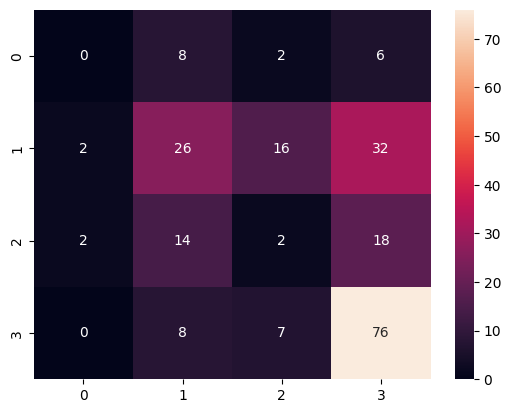

In [30]:
sns.heatmap(cm_rf,annot=True)